In [39]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from io import BytesIO
import requests
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet', include_top=True)

In [40]:
def load_random_dog_image():
    # Dog API URL
    dog_api_url = "https://dog.ceo/api/breeds/image/random"
    
    try:
        # Get a random dog image
        response = requests.get(dog_api_url)
        response.raise_for_status()
        data = response.json()
        if data['status'] == 'success':
            image_url = data['message']
            # Extract breed from the URL
            breed = image_url.split('/')[4].replace('-', ' ')
        else:
            raise ValueError("Failed to fetch dog image from the API")
        
        # Download and process the image
        img_response = requests.get(image_url)
        img_response.raise_for_status()
        img = Image.open(BytesIO(img_response.content))
        img = img.convert('RGB')  # Ensure image is in RGB format
        img = img.resize((224, 224))  # MobileNetV2 input size
        
        # Convert to numpy array and preprocess
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        return img_array, img, image_url, breed
    
    except requests.exceptions.RequestException as e:
        raise Exception(f"Failed to fetch dog image: {str(e)}")

In [41]:
def predict_and_display(img_array, img, image_url, actual_breed):
    # Make prediction
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    # Display image with predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    
    # Create prediction text
    pred_text = "Top 3 predictions:\n"
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        pred_text += f"{i+1}: {label} ({score:.2f})\n"
    
    plt.title(f"Dog Breed Classification\n\nActual Breed: {actual_breed}\n\n{pred_text}", fontsize=14)
    plt.text(0, -20, f"Image URL: {image_url}", fontsize=8, wrap=True)
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


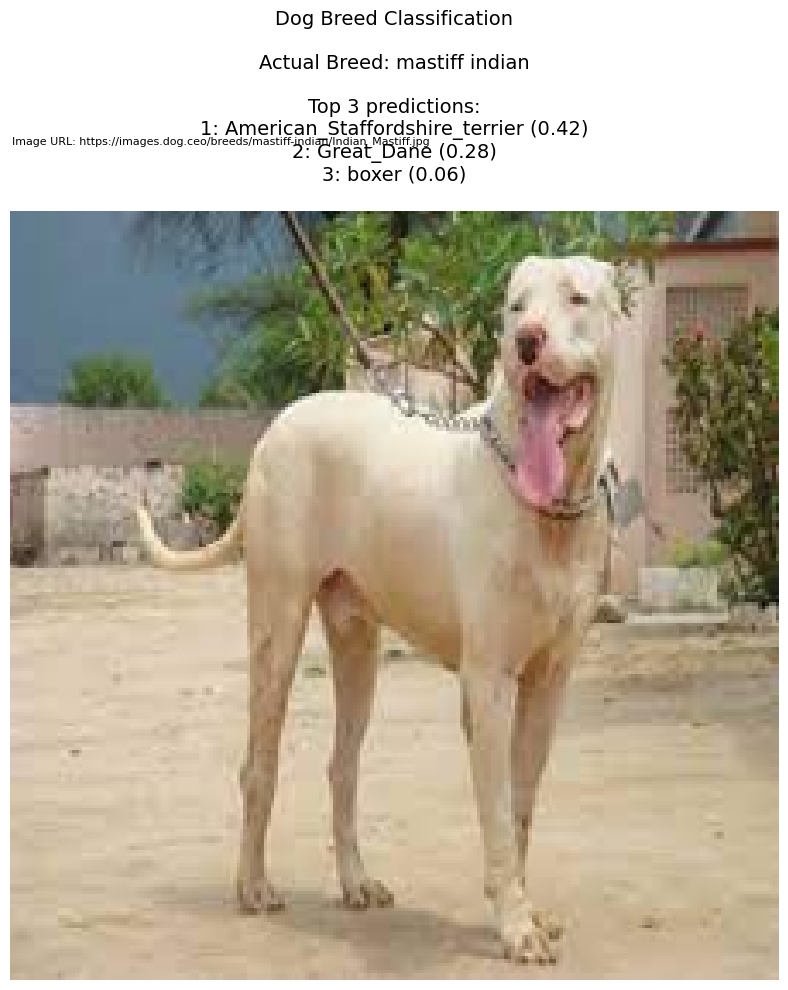

In [43]:
# Main execution
try:
    img_array, img, image_url, actual_breed = load_random_dog_image()
    predict_and_display(img_array, img, image_url, actual_breed)
except Exception as e:
    print(f"An error occurred: {str(e)}")